In [1]:
# import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base

In [3]:
# create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# inspect tables and their column names
inspector = inspect(engine)
table_nm = inspector.get_table_names()
n = 1
for table in table_nm:
    print(f"Table {n} {table}")
    n+=1
    columns = inspector.get_columns(table)
    for col in columns:
        print(f"     Col: {col['name']}  {col['type']}")

Table 1 measurement
     Col: id  INTEGER
     Col: station  TEXT
     Col: date  TEXT
     Col: prcp  FLOAT
     Col: tobs  FLOAT
Table 2 station
     Col: id  INTEGER
     Col: station  TEXT
     Col: name  TEXT
     Col: latitude  FLOAT
     Col: longitude  FLOAT
     Col: elevation  FLOAT


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prc_analysis = pd.read_sql('Select station, date, prcp, tobs from measurement', con = engine, columns = [['station'],['date'],['prcp'],['tobs']])
prc_analysis.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0


In [10]:
# convert date to a date data type for utilizing date functions (function copied from Stackoverflow)
prc_analysis['date']=pd.to_datetime(prc_analysis["date"],format="%Y-%m-%d",errors='coerce')

In [11]:
# create two date ranges min and max to get 1 year date ranges
max_date = prc_analysis.date.max().date()
min_date = max_date - dt.timedelta(days=365)
print("Date range is between " +str(min_date)+ " and "+str(max_date))

Date range is between 2016-08-23 and 2017-08-23


In [12]:
# query to retrieve the data for 1 year
year_prc = prc_analysis.loc[prc_analysis['date']>=min_date]
year_prc.set_index('date', inplace=True)
year_prc

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,station,prcp,tobs
date,,,
2016-08-23,USC00519397,0.00,81.0
2016-08-24,USC00519397,0.08,79.0
2016-08-25,USC00519397,0.08,80.0
2016-08-26,USC00519397,0.00,79.0
2016-08-27,USC00519397,0.00,77.0
2016-08-28,USC00519397,0.01,78.0
2016-08-29,USC00519397,0.00,78.0
2016-08-30,USC00519397,0.00,79.0
2016-08-31,USC00519397,0.13,80.0


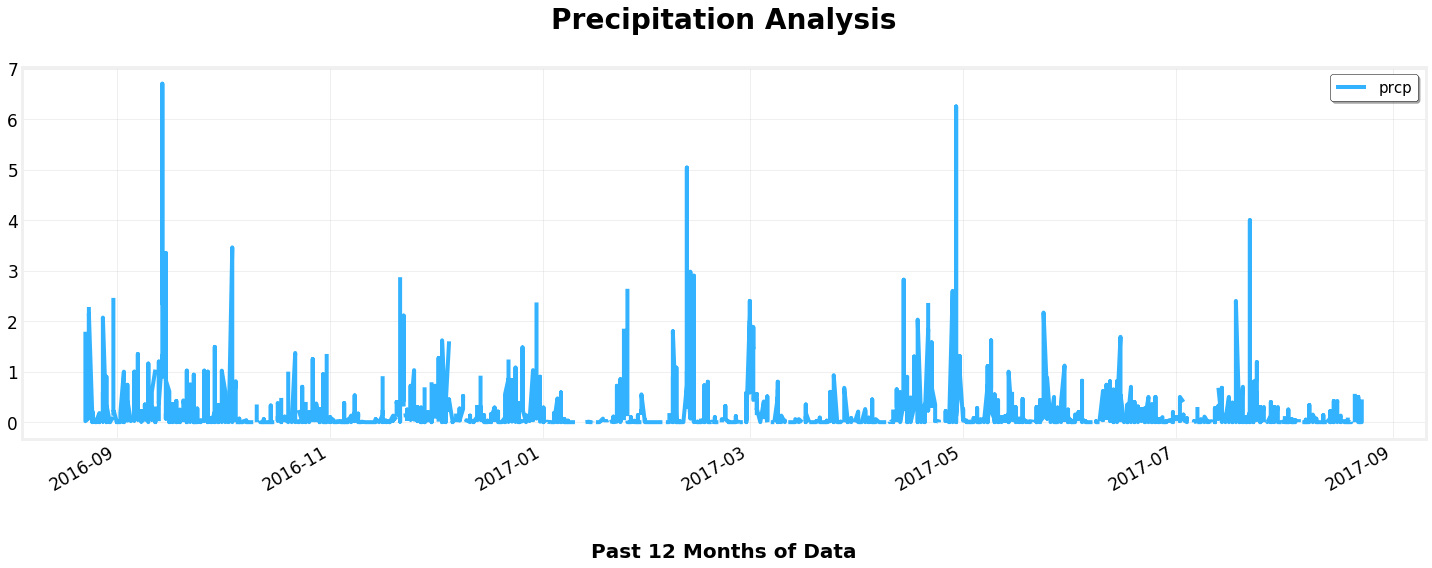

In [13]:
# create plots

ax = year_prc.plot.line(y="prcp",figsize=(20,8), fontsize=17, color="#33B3FF")
ax.patch.set_facecolor("#FFFFFF")
ax.set_xlabel(xlabel="\n\nPast 12 Months of Data", fontsize=20, color="#000000", fontweight="bold")
ax.set_frame_on(b=True)
ax.set_facecolor("#FFFFFF")
ax.grid(True, alpha=.3)
ax.legend(frameon=True, fancybox=True, facecolor="#FFFFFF", edgecolor="#000000", shadow=True, loc="best", fontsize=15, mode="exapnd")
ax.label_outer()
ax.set_title("Precipitation Analysis\n", fontsize=28, color="#000000", fontweight="bold")
plt.tight_layout()
plt.savefig("Images/prcp_analysis.png")

In [14]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prc.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
stn_data = pd.read_sql('Select s.station, count(m.station) station_count from station s, measurement m where s.station=m.station group by m.station', 
                       con = engine, columns = [['station'],['station_count']])
stn_data

,station,station_count
0,USC00511918,1979
1,USC00513117,2709
2,USC00514830,2202
3,USC00516128,2612
4,USC00517948,1372
5,USC00518838,511
6,USC00519281,2772
7,USC00519397,2724
8,USC00519523,2669


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# sorting the values desceding order
stn_data.sort_values(by = 'station_count',ascending=False, inplace=True)
# setting the index to station
stn_data.set_index('station')
stn_data

,station,station_count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_activity = stn_data.station_count.max()
station_max = stn_data.iloc[0,0]

In [19]:
# create a query to collect all the temperature data across dates for stationid and converting to a dataframe
results = session.query(Measurement.date,Measurement.tobs).\
            filter(Measurement.date >= min_date).\
            filter(Measurement.station==station_max).all()
max_df = pd.DataFrame(np.array(results), columns=(["date","tobs"]))

# convert tobs to a float
max_df.tobs = max_df.tobs.astype(float)
max_df.dtypes

date     object
tobs    float64
dtype: object

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_df.tobs.describe()

count    352.000000
mean      73.107955
std        4.733315
min       59.000000
25%       70.000000
50%       74.000000
75%       77.000000
max       83.000000
Name: tobs, dtype: float64

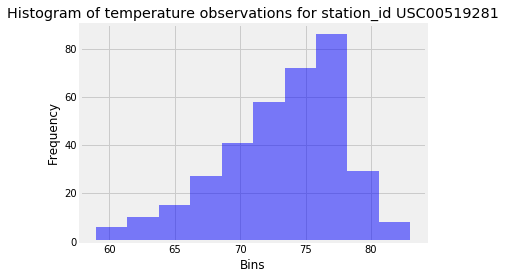

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x = max_df.tobs
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, label=x[0])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of temperature observations for station_id USC00519281')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig("Images/HistogramTemperature.png")
plt.show()


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [24]:
# define start and end dates from the previous computation
end_date = prc_analysis.date.max().date()
start_date = max_date - dt.timedelta(days=365)

In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#dates = calc_temps('2012-02-28', '2012-03-05')
dates = calc_temps(start_date,end_date)
temp_table = pd.DataFrame(np.column_stack([dates]), columns=["Min-Temp","Avg-Temp","Max-Temp"])
pltpts = list(np.ravel(temp_table))
pltpts

[58.0, 74.59058295964125, 87.0]

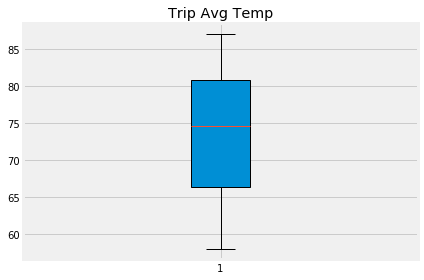

In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

import numpy as np

fig, ax = plt.subplots()

x = range(len(pltpts))
ax.boxplot(pltpts, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.savefig("Images/boxplot.png")
plt.show()



In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prcp_data = pd.read_sql('Select s.station, s.name, sum(m.prcp) total_rainfall,s.latitude,s.longitude,s.elevation from station s, measurement m where s.station=m.station group by m.station', 
                       con = engine, columns = [['station'],['name'],['total_rainfall'],['latitude'],['longitude'],['elevation']])
prcp_data

,station,name,total_rainfall,latitude,longitude,elevation
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",92.68,21.31520,-157.99920,0.9
1,USC00513117,"KANEOHE 838.1, HI US",382.62,21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",234.49,21.52130,-157.83740,7.0
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",1068.09,21.33310,-157.80250,152.4
4,USC00517948,"PEARL CITY, HI US",43.44,21.39340,-157.97510,11.9
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",70.87,21.49920,-158.01110,306.6
6,USC00519281,"WAIHEE 837.5, HI US",588.64,21.45167,-157.84889,32.9
7,USC00519397,"WAIKIKI 717.2, HI US",131.62,21.27160,-157.81680,3.0
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",295.68,21.33556,-157.71139,19.5


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
end_date = prc_analysis.date.max().date()
begin_date = prc_analysis.date.min().date()
print(f"The temperature data is available for the period {begin_date} and {end_date}")
date_input = input(f"Please choose a start date between {begin_date} and {end_date}")
date = func.strftime("%m-%d",date_input)
daily_normals(date)

The temperature data is available for the period 2010-01-01 and 2017-08-23
Please choose a start date between 2010-01-01 and 2017-08-232017-04-21


[(66.0, 72.32142857142857, 78.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = '2017-07-01'
end_date ='2017-07-14'
# Use the start and end date to create a range of dates

dates = session.query(Measurement.date).filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).group_by(Measurement.date).all()

# List comprehension to get the elements in the tuple from the dates query 
trip_dates = [x[0] for x in dates]
trip_dates_mod = [x[5:] for x in trip_dates]
start_date = trip_dates_mod[0]
end_date = trip_dates_mod[-1]
print(f"The start date for the trip is {start_date} and end date for the trip is {end_date}")

# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
                       filter(func.strftime("%m-%d", Measurement.date) <= end_date).\
                       group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregate Daily Normals for 07-01 to 07-14")
daily_normals

The start date for the trip is 07-01 and end date for the trip is 07-14
Aggregate Daily Normals for 07-01 to 07-14


[(67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0),
 (68.0, 76.19298245614036, 83.0),
 (68.0, 75.62068965517241, 82.0),
 (70.0, 75.78947368421052, 81.0),
 (67.0, 75.96491228070175, 82.0),
 (69.0, 76.1896551724138, 81.0),
 (61.0, 76.2280701754386, 82.0)]

In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(np.array(daily_normals), columns=(["min","average","max"]))
# add dates to pandas dataframe
normals_df['date']=trip_dates
# Change datatype from element to datetime object on Pandas 
normals_df['date'] = pd.to_datetime(normals_df['date'], format='%Y-%m-%d')

# Set index to date
normals_df.set_index('date',inplace=True)

normals_df

,min,average,max
date,,,
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0
2017-07-09,68.0,76.192982,83.0


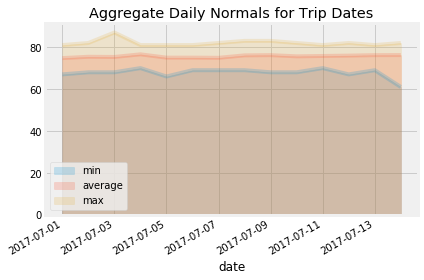

In [33]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.savefig("Images/AggDailyNormals.png")
plt.show()